In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def strat(irradiance,v_bar,c=1):
    residual = (irradiance - np.mean(irradiance))
    v = v_bar+c*residual/F
    return v

def strat_poly(irradiance, v_bar, c,  n=1):
    # c: scalar proportion
    residual = (irradiance - np.mean(irradiance))
    residual = abs(residual ** n) * np.sign(residual)
    adj = (residual) * c
    vel = v_bar + adj
    return vel

def strat_poly_normalised(irradiance,  v_bar, c, n=1):
    # c: scalar proportion
    residual = (irradiance - np.mean(irradiance))
    residual = abs(residual ** n) * np.sign(residual)
    adj = (residual / max(residual)) * c
    vel = v_bar - np.mean(adj) + adj
    return vel

def cal_e_dt(power,t):
    return np.trapz(power,x=t)

def cal_e_dx(power, velocity,x):
    return np.trapz(power / velocity,x=x)

19.047619049539406


<AxesSubplot:title={'center':'Net energy'}, xlabel='Vstd', ylabel='Enet'>

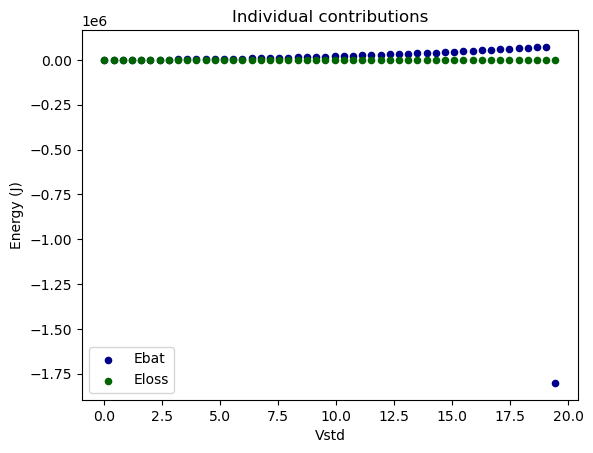

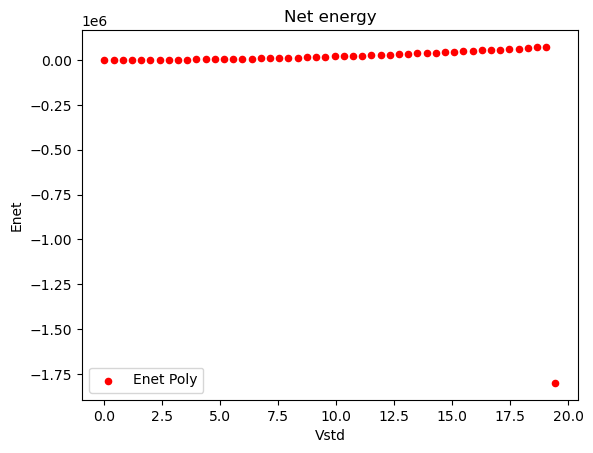

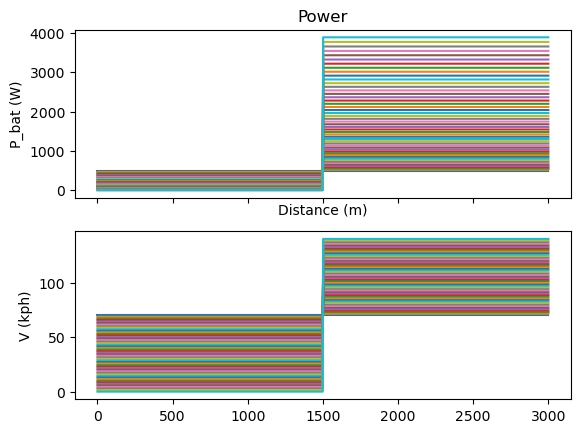

In [34]:
L = 3000
npoint = 1000
x = np.linspace(0, L, num=npoint)

grad_bar = 0
dgrad = 0.16
dgrad = 1e-9
grad = np.piecewise(x, [x < L / 2, x >= L / 2], [lambda g: grad_bar+dgrad , lambda g: grad_bar-dgrad])

v_bar = 70 / 3.6
F = 1/2*1.225*0.108*(70/3.6)**2
m = 250
g = 9.81
R = 0.036
V_nom = 35*3.6

C = (2*v_bar*dgrad*(F+m*g*(grad_bar+dgrad))**2+m*g*dgrad**2)/(2*dgrad**2*(F+m*g*(grad_bar+dgrad))**2)


Estdfig, estdax = plt.subplots(1)
Enetfig, enetax = plt.subplots(1)
estdax.set(title='Individual contributions')
enetax.set(title='Net energy')

linfig, linax = plt.subplots(2, sharex=True)
linax[0].set(ylabel='P_bat (W)', title='Power')

estd = []
for j, axes in enumerate(linax[1:]):
    j += 1
    for i in np.linspace(0, -C, num=50):
        vel = strat_poly(grad, v_bar, i,  j)
        linax[1].plot(x, vel * 3.6)
        linax[1].set(ylabel='V (kph)')
        P_bat = 0.5*1.225*0.108*vel**3 + m*g*grad
        P_loss = (R/V_nom**2)*P_bat**2
        itr = [cal_e_dx(P_bat, vel,x), cal_e_dx(P_loss, vel,x), np.std(vel), i]
        estd.append(itr)
        linax[0].plot(x, P_bat)
        # print(np.mean(vel))
# print(estd)
linax[0].set(xlabel='Distance (m)')

df = pd.DataFrame(estd)
df.columns = ['Ebat', 'Eloss', 'Vstd','c']
df.loc[:, 'Ebat'] = df['Ebat'] - df['Ebat'].iloc[0]
df.loc[:, 'Eloss'] = df['Eloss'] - df['Eloss'].iloc[0]  # make it delta to baseline
df.plot.scatter(y="Ebat", x="Vstd", color="DarkBlue", label="Ebat", ax=estdax)
df.plot.scatter(y="Eloss", x="Vstd", color="DarkGreen", label="Eloss", ax=estdax)
estdax.set(xlabel='Vstd', ylabel='Energy (J)')
df.loc[:, 'Enet'] =  df['Ebat'] + df['Eloss']
Enetarray = df['Enet'].to_numpy()
print(maxstd := df['Vstd'].to_numpy()[np.argmax(Enetarray)])
df.plot.scatter(y='Enet', x='Vstd', ax=enetax, label="Enet Poly", color="Red")

In [35]:
~(2*v_bar*dgrad*(F+m*g*(grad_bar+dgrad))**2+m*g*dgrad**2)/(2*dgrad**2*(F+m*g*(grad_bar+dgrad))**2)

TypeError: bad operand type for unary ~: 'float'

In [ ]:
np.max(strat_poly(grad, v_bar, C,  1))

In [ ]:
(-m*g*dgrad)/(2*(F+m*g*(grad_bar+dgrad))**2)

In [ ]:

plt.plot(x, vel * 3.6)

In [ ]:

0, -(C+1)